# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Business Understanding:
1-2 things we want to predict
Based on type of data we want to predict, categorical/discrete/boolean/etc.

Predict = Price
Categorize = 




In [1]:
#!pip install missingno
#!pip install plotnine

In [2]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
warnings.filterwarnings('ignore') #ignoring warnings

In [3]:
# NOTE: need to change file per user
#df_raw = pd.read_csv(r'C:\Data\used_cars_data.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')
df_raw = pd.read_csv('C:/Users/Queen/Desktop/Pandas_Demo/kaggle_used_cars_data.csv')

In [4]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,1FTEW1CP3LFC52880,43.6 in,NaN,--,67.1 in,Pickup Truck,NaN,Huntsville,20.0,NaN,...,A,Automatic,t87709,XL SuperCrew RWD,NaN,4X2,4X2,145 in,96.8 in,2020
1,3N1CP5CV6LL501109,33.2 in,NaN,NaN,NaN,SUV / Crossover,NaN,Opelousas,31.0,NaN,...,CVT,Continuously Variable Transmission,t90150,SV FWD,NaN,FWD,Front-Wheel Drive,103.1 in,69.3 in,2020
2,5LM5J7XC5LGL29065,40.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Fort Myers,17.0,NaN,...,A,Automatic,t85101,Reserve AWD,NaN,AWD,All-Wheel Drive,119 in,89.9 in,2020
3,VB57A151926,NaN,NaN,NaN,NaN,NaN,NaN,Boerne,NaN,NaN,...,A,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1957
4,1G1FE1R76L0144294,29.9 in,NaN,NaN,NaN,Coupe,NaN,Peoria,16.0,NaN,...,M,6-Speed Manual,t85926,1SS Coupe RWD,NaN,RWD,Rear-Wheel Drive,110.7 in,74.7 in,2020


In [5]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 30000
Total # of Columns: 66


### Data Meaning Type

#### Domain based Attribute Reduction
Before we do a deep dive into the types of our data, we will first look into reducing it from a  The total dataset has 66 attributes After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

In [6]:
#subsetting columns by referencing the column indexes
df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   vin                   30000 non-null  object 
 1   body_type             29851 non-null  object 
 2   city                  30000 non-null  object 
 3   city_fuel_economy     25067 non-null  float64
 4   combine_fuel_economy  0 non-null      float64
 5   daysonmarket          30000 non-null  int64  
 6   engine_cylinders      28994 non-null  object 
 7   engine_displacement   28227 non-null  float64
 8   engine_type           28994 non-null  object 
 9   exterior_color        30000 non-null  object 
 10  frame_damaged         15820 non-null  object 
 11  franchise_dealer      30000 non-null  bool   
 12  franchise_make        24272 non-null  object 
 13  fuel_tank_volume      28366 non-null  object 
 14  fuel_type             29156 non-null  object 
 15  has_accidents      

### Data Quality

<AxesSubplot:>

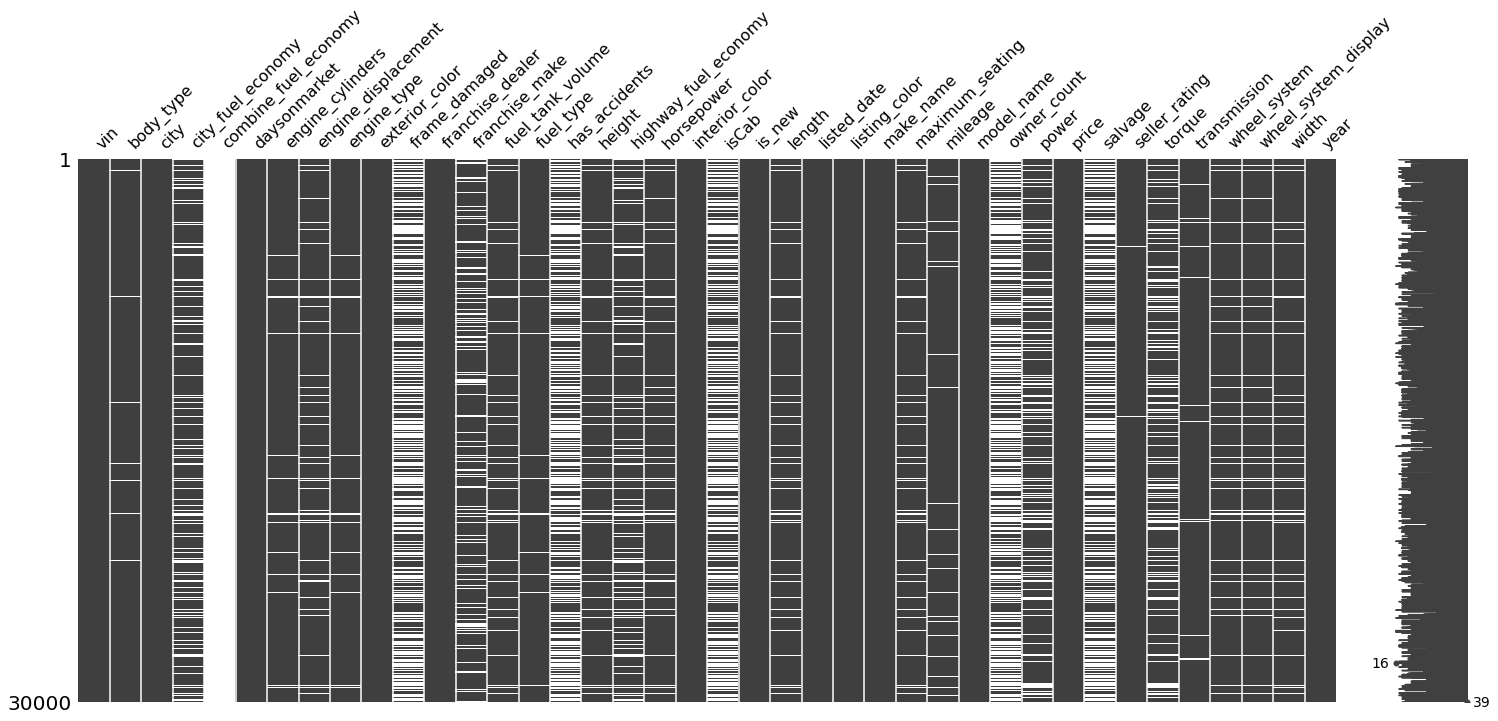

In [7]:
msno.matrix(df_cln_1)

After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

In [8]:
# removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty
df_cln_1 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_1.shape[1])

39


We also found that 'engine_cylinders','engine_type' contains the same data in two separate columns, so we first test if this condition is true and if it is, we will remove one.

In [9]:
#observing if 'engine_cylinders','engine_type' is the same data
if df_cln_1['engine_cylinders'].equals(df_cln_1['engine_type']) == True:
    df_cln_1 = df_cln_1.drop(columns='engine_cylinders')
    print(df_cln_1.shape[1])

38


We also found additional columns that were simply descriptions of another columns, for example. The 'wheel_system_display' attribute is simply a longer, more descriptive version of the 'wheel_system' attribute ("Front-Wheel Drive" vs "FWD"). For columns that follow this trend, we will remove the descriptive column from our dataset. 

In [10]:
print(df_cln_1[['wheel_system']])
print(df_cln_1[['wheel_system_display']])
df_cln_1 = df_cln_1.drop(columns='wheel_system_display')
print(df_cln_1.shape[1])

      wheel_system
0              4X2
1              FWD
2              AWD
3              NaN
4              RWD
...            ...
29995          4WD
29996          FWD
29997          NaN
29998          FWD
29999          AWD

[30000 rows x 1 columns]
      wheel_system_display
0                      4X2
1        Front-Wheel Drive
2          All-Wheel Drive
3                      NaN
4         Rear-Wheel Drive
...                    ...
29995     Four-Wheel Drive
29996    Front-Wheel Drive
29997                  NaN
29998    Front-Wheel Drive
29999      All-Wheel Drive

[30000 rows x 1 columns]
37


We also discussed that 'interior_color' attribute has 45,726 distinct color values and so due to the sheer volume and complexity (# of levels in this attribute). We also decided to remove it from our dataset since it is unrealistic for the type of modeling we are doing and would effect the overall performance of our model.

In [11]:
#note this plot takes forever to run
#(ggplot(df_cln_1)+aes(x="interior_color", y="price")+geom_line())

In [12]:
print(df_cln_1['interior_color'].nunique())

df_cln_1 = df_cln_1.drop(columns='interior_color')
print(df_cln_1.shape[1])

2906
36


Another attribute we found that could be removed as the "listed_date" attribute. Since there was no other 'datetype' attributes available in our dataset, we didn't really see a point with keeping it as there was no other data reference to use it with. Additionally, the attribute 'daysonmarket' already pre-aggregated the number of days it took to sell a vehicle, which the listed date would've been used for otherwise. Because of this, we will also remove it from our dataframe.

In [13]:
df_cln_1 = df_cln_1.drop(columns='listed_date')
print(df_cln_1.shape[1])

35


At this point, we decided to take a break from subsetting our data and take a look at the amount of missing values in the current dataframe. Our intention in mind was to see what the data looked like after it was cleaned to further proceed reducing the amount of attributes we had.

### Data Cleaning - Duplicates, Missing Data,  Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. To begin, we will check if any of the VINs have duplicates in the dataset, since this the VIN is unique to a car we are expecting there shouldn't be, but in cases there is, we will remove it.

In [14]:
df_cln_1[df_cln_1.duplicated(['vin'], keep=False)].sort_values('vin')

,vin,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,exterior_color,frame_damaged,franchise_dealer,...,owner_count,power,price,salvage,seller_rating,torque,transmission,wheel_system,width,year


We can see that that there are duplicates even though the 'vin' should be specific and distinct to each car. There is a total of 80 records that contain duplicates. We will then remove these duplicates while keeping the 'first' record so that one copy of the duplcites will remain. We can see that after we cleaned these duplicates, our total # of records drop from 3,000,040 to 3,000,000. 

In [15]:
print(df_cln_1.shape[0])

30000


In [16]:
df_cln_1 = df_cln_1.drop_duplicates(subset=['vin'], keep='first')
print("# of records after removing duplicates: "+str(df_cln_1.shape[0]))

# of records after removing duplicates: 30000


After we have cleaned our duplicates. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

<AxesSubplot:>

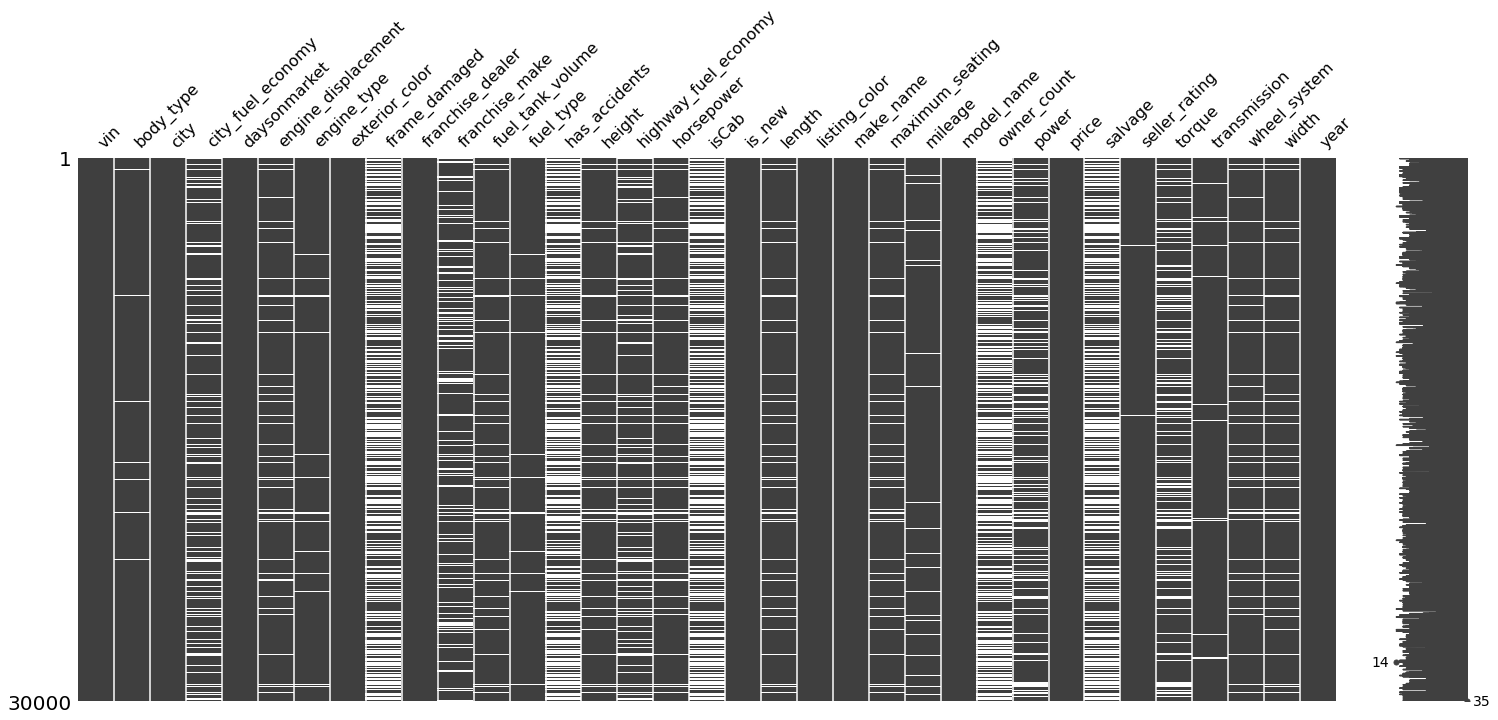

In [17]:
#visualizatin of our data BEFORE removing all rows with missing data
msno.matrix(df_cln_1)

In [18]:
# remove the missing values
df_cln_2 = df_cln_1.dropna()
print(len(df_cln_2))

6990


In [19]:
# checking the row counts of columns to see the missing rows
df_cln_2.count()

vin                     6990
body_type               6990
city                    6990
city_fuel_economy       6990
daysonmarket            6990
engine_displacement     6990
engine_type             6990
exterior_color          6990
frame_damaged           6990
franchise_dealer        6990
franchise_make          6990
fuel_tank_volume        6990
fuel_type               6990
has_accidents           6990
height                  6990
highway_fuel_economy    6990
horsepower              6990
isCab                   6990
is_new                  6990
length                  6990
listing_color           6990
make_name               6990
maximum_seating         6990
mileage                 6990
model_name              6990
owner_count             6990
power                   6990
price                   6990
salvage                 6990
seller_rating           6990
torque                  6990
transmission            6990
wheel_system            6990
width                   6990
year          

<AxesSubplot:>

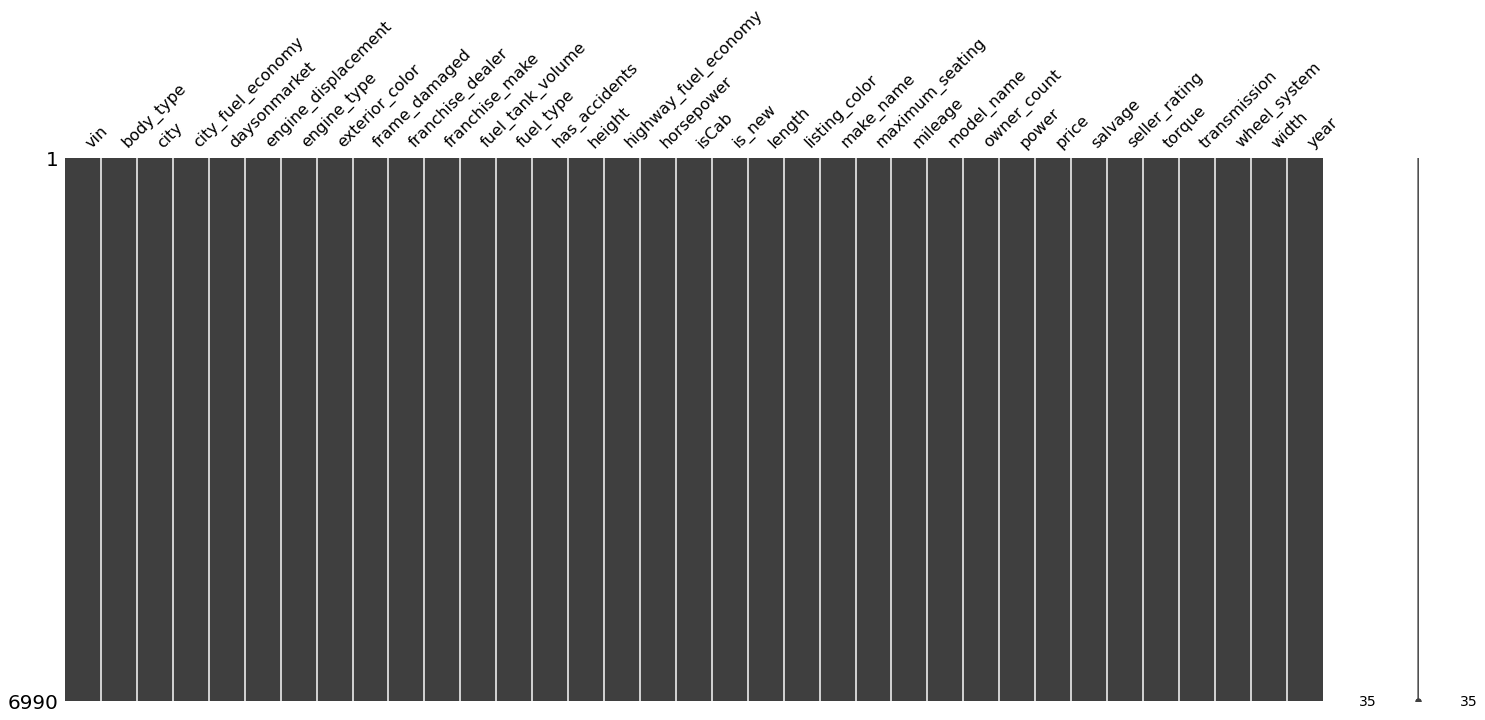

In [20]:
#visualizatin of our data AFTER removing all rows with missing data
msno.matrix(df_cln_2)

We decided that since our original dataset was large (10gb with 3million records), that instead of imputing data based on the mean or other statistical types, that deleting all records with empty values still returned 700,000 total records that not only provides plenty of data leftover, but also raw data that isn't imputed. 

### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

In [21]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','isCab','is_new','length','listed_date','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

['I4' 'V8' 'V6' 'V6 Flex Fuel Vehicle' 'V8 Flex Fuel Vehicle' 'H4' 'I6'
 'I5' 'H6' 'I4 Flex Fuel Vehicle' 'I4 Diesel' 'I6 Diesel' 'I3' 'V12'
 'V6 Biodiesel' 'W12' 'V6 Diesel' 'I4 Hybrid']
['granite crystal metallic clearcoat' 'Alien II' 'Black' ...
 'Oceanus Pearl' 'Phantom Gray Metallic' 'RED ALERT']
[False True]
[ True]
['Ford' 'Jeep' 'Chevrolet' 'Subaru' 'Kia' 'Nissan' 'Mazda' 'Lexus' 'Honda'
 'INFINITI' 'Hyundai' 'Buick' 'BMW' 'Toyota' 'Aston Martin'
 'Mercedes-Benz' 'Cadillac' 'Volkswagen' 'RAM' 'Jaguar' 'Volvo'
 'Mitsubishi' 'Genesis' 'Lincoln' 'Dodge' 'Rolls-Royce' 'Chrysler'
 'Porsche' 'Land Rover' 'Audi' 'FIAT' 'Acura' 'GMC' 'Scion' 'Maserati'
 'Lamborghini' 'Lotus' 'MINI' 'Alfa Romeo' 'Bentley' 'Ferrari']
['13.5 gal' '14.2 gal' '26 gal' '18.8 gal' '19.5 gal' '15.9 gal'
 '18.5 gal' '15.5 gal' '14.5 gal' '22.4 gal' '20.1 gal' '17.4 gal'
 '16.4 gal' '15.6 gal' '13.2 gal' '19 gal' '14.8 gal' '15.1 gal'
 '23.3 gal' '14 gal' '22 gal' '21.1 gal' '18.1 gal' '12.4 gal' '16.9 gal'
 '13

KeyError: 'listed_date'

In [ ]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

In [ ]:
#removing unecesary string values in columns
#then cleaning up any values that contain '--' and replacing it with NaN
#Lastly, converting the value first to a string type and then to a float type

df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_2['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

In [ ]:
#doing a quick profile on the subsetted columns
print(df_cln_2.info())

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the remainder of our data attributes. A quick count on our datatypes shows us that we still have 19 categorical values, 14 numerical types and 2 booleans (true/false) left to work wikth. Since our ultimate goal is doing a regression and one classification model, we will next work on trimming down our 'object' categorical data types.

In [ ]:
#count of datatypes in current dataframe.
print(df_cln_2.dtypes.value_counts())
print("---------------------------------------------")
#showing only the object type columns
print(df_cln_2.select_dtypes(include='object').columns)

After the team decided to choose 'body_type' as main the main classification term. We decided to create a final dataframe with only the attributes we found useful for our model which excludes:
- **'vin'**: acts as primary index but not useful for modeling
<br>
- **'city'**: no model of ours will require geographic features, also since there is not state or zip attributes, it is ambiguous
<br>
- **'engine_type'**: use for EDA but 'horsepower' is the continous version of this attribute
<br>
- **'franchise_dealer'**: not useful for our model 
<br>
- **'franchise_make'**: same as 'make_name' which has too many levels as a categorical value and not necessary for our predictin model
<br>
- **'fuel_tank_volume'**: 
<br>
- **'fuel_type'**: 
<br>
- **'height'**: 
<br>
- **'isCab'**:
<br>
- **'length'**:
<br>
- **'listing_color'**: 
<br>
- **'make_name'**: 
<br>
- **'model_name'**: 
<br>
- **'power'**: 'horsepower' attribute will be used instead
<br>
- **'salvage'**: the value that is associated with depreciation number which is more of accounting. In real world, we pay what is the market value of the car.
<br>
- **'torque'**:  'horsepower' attribute will be used instead
<br>
- **'transmission'**: 
<br>
- **'wheel_system'**: 
<br>
- **'width'**:

In [50]:
#creating final df for analysis
df_final = df_cln_2.iloc[:, np.r_[1,3:5,7,12,14:16,17,22:24,25,27,29,34]]
print(df_final.info())
print(df_final.dtypes.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6990 entries, 8 to 29999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             6990 non-null   object 
 1   city_fuel_economy     6990 non-null   float64
 2   daysonmarket          6990 non-null   int64  
 3   exterior_color        6990 non-null   object 
 4   fuel_type             6990 non-null   object 
 5   height                6990 non-null   object 
 6   highway_fuel_economy  6990 non-null   float64
 7   isCab                 6990 non-null   object 
 8   maximum_seating       6990 non-null   object 
 9   mileage               6990 non-null   float64
 10  owner_count           6990 non-null   float64
 11  price                 6990 non-null   float64
 12  seller_rating         6990 non-null   float64
 13  year                  6990 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 819.1+ KB
None
object 

### Simple Statistics

### Visualize Attributes

### Explore Joint Attributes

When it comes to joint attributes, we would like to see if there's correlation between make name, price, wheel system and car body type.

First, we asked: 

*What's the most popular make name for used SUV, pickup Truck, sedan and convertibale?*
* "Ford" is the most popular make name for used SUV, Pickup Truck and Convertiable
* "Toyota" is the most popular make name for used Sedan

<AxesSubplot:xlabel='make_name'>

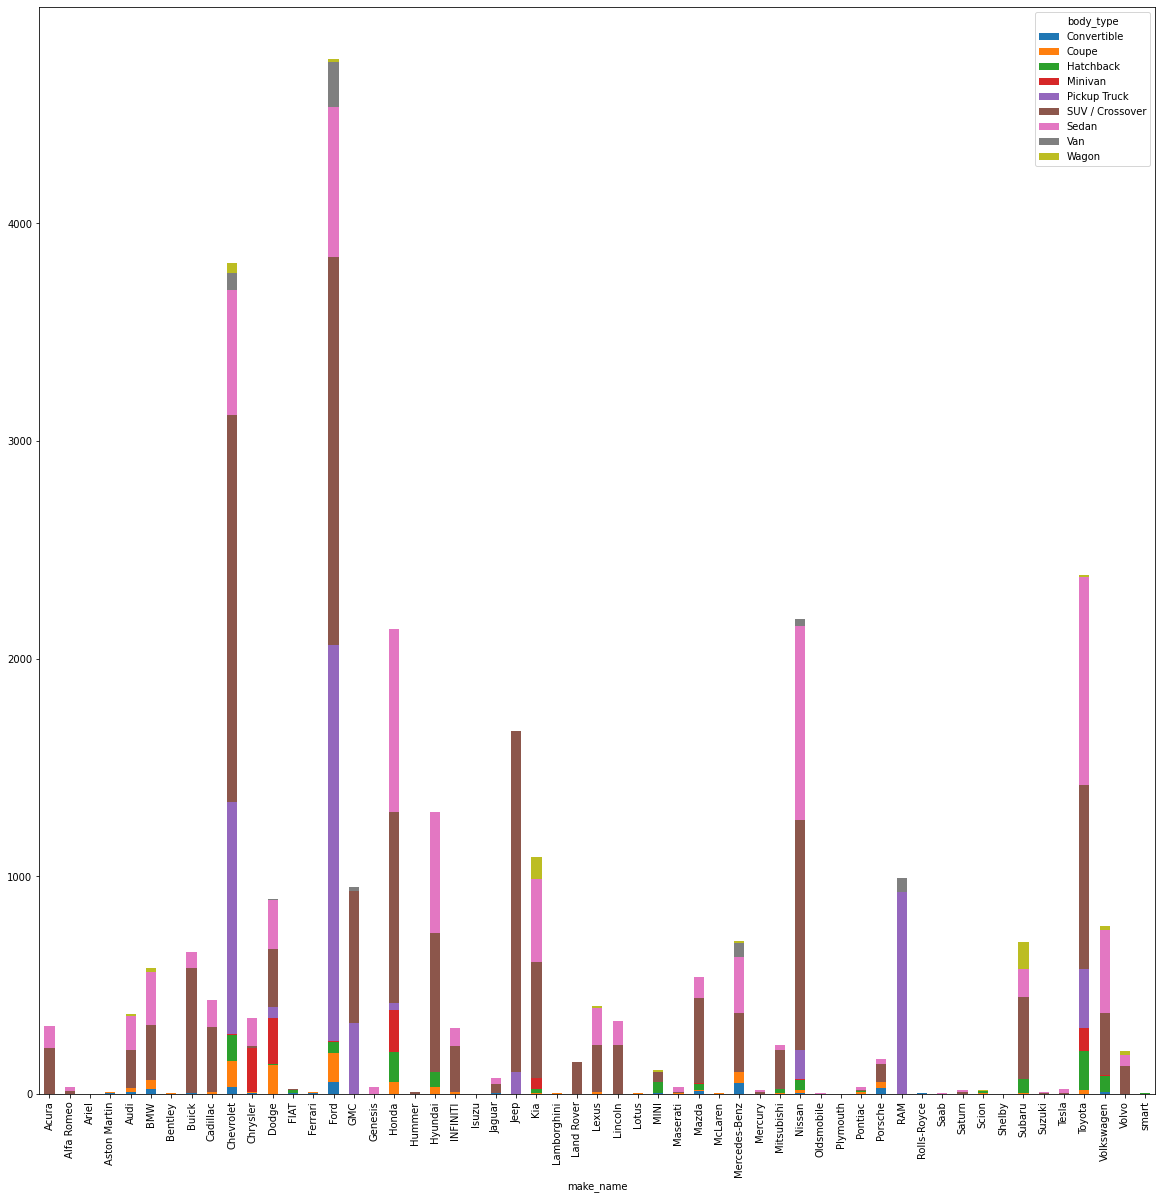

In [54]:
df_carMake = pd.crosstab(df_cln_1.make_name, df_cln_1.body_type)
df_carMake.plot(figsize=(20,20), kind="bar", stacked = True)

Another question we asked was:

*What's the most popular make name for transmission (such as Automatic, CVT, Dual Clutch, or Manual)?*

* "Ford" is the most popular make name for 'Automatic' transmission
* "Nissan" is the most popular make name for 'CVT' transmission
* "Acura" is the most popular make name for 'Dual Clutch' transmission
* "Ford" is the most popular make name for 'Manual' transmission

<AxesSubplot:xlabel='make_name'>

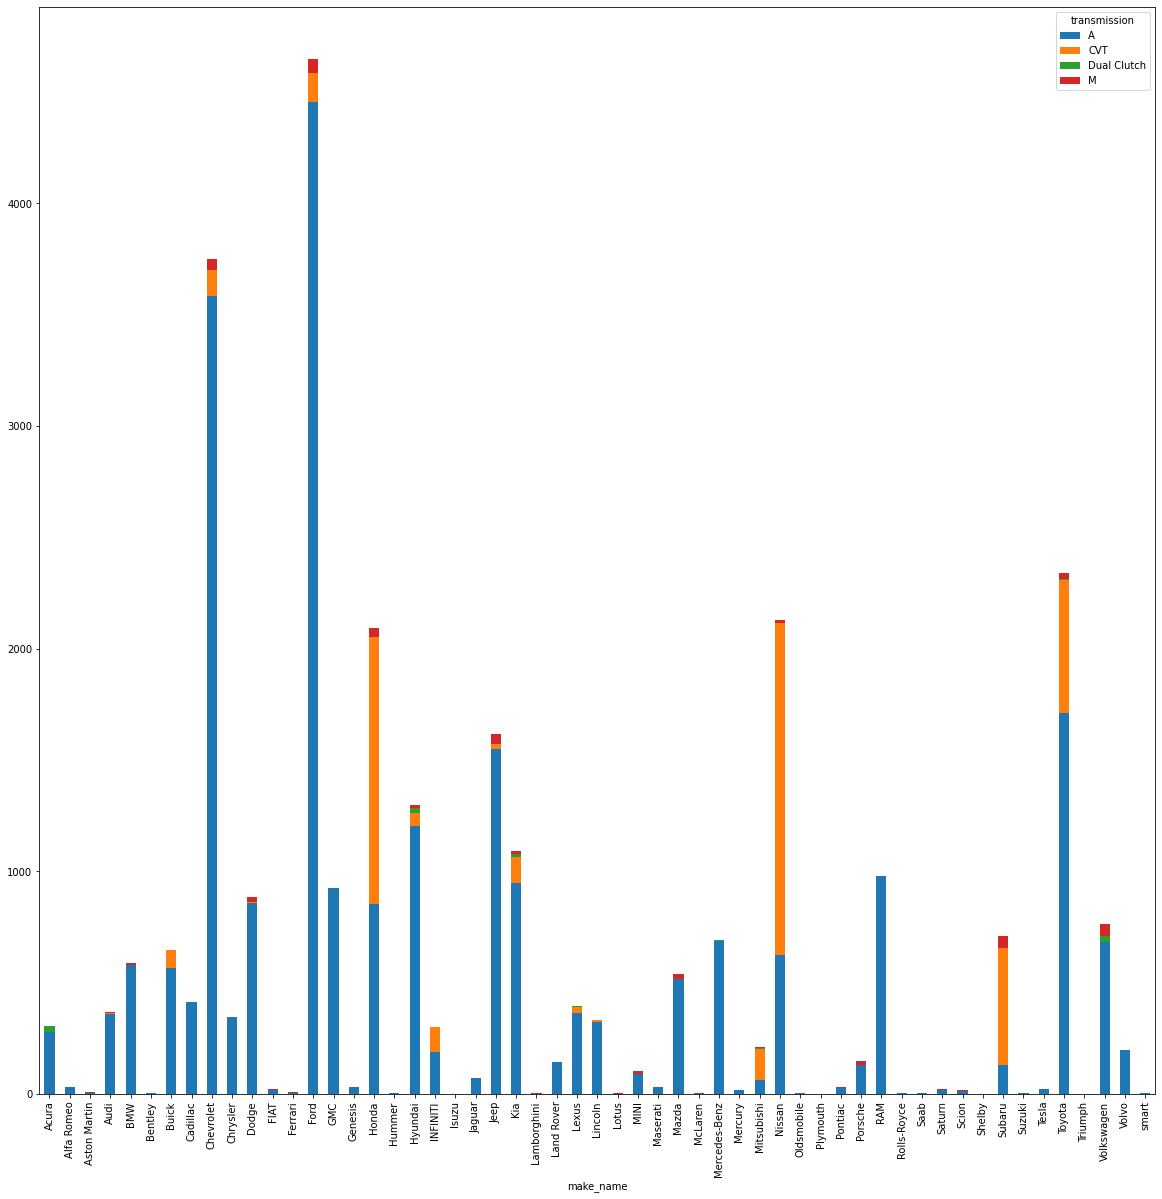

In [23]:
df_transmission = df_cln_1.groupby(['make_name', 'transmission'])['transmission'].count().unstack().fillna(0)
df_transmission.plot(figsize=(20,20), kind="bar", stacked = True)

We then asked:

*What's the highest amount of seating people are looking for when looking to buy a used car?*
* The most popular number of seats for used cars is 5 seats
* The second most popular number of seats for used car is 6 seats
* "Ford" is the most popular make name for both 5 seats used cars, and 6 seats used cars

<AxesSubplot:xlabel='make_name'>

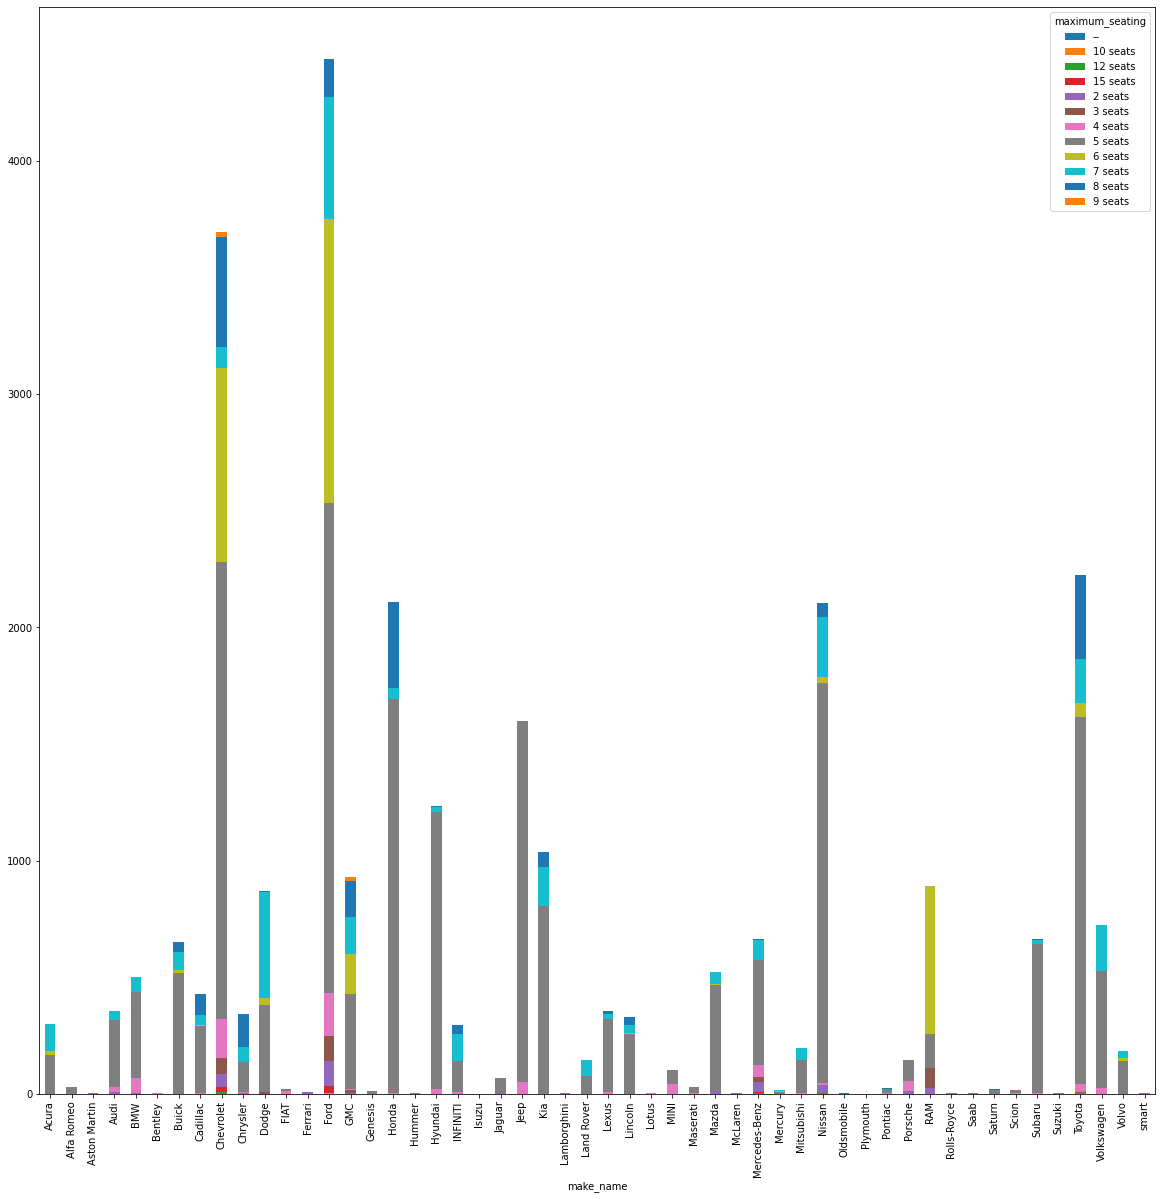

In [25]:
df_carSeats = pd.crosstab(df_cln_1.make_name, df_cln_1.maximum_seating)
df_carSeats.plot(figsize=(20,20), kind="bar", stacked = True)

Another interesting observation was:
*How is the data distributed by FWD (front weel drive)/RWD (rear wheel drive)?*
* Most of the used Sedans sold are FWD (front weel drive)
* Most of the used convertibles sold are RWD (real wheel drive)

<AxesSubplot:xlabel='make_name'>

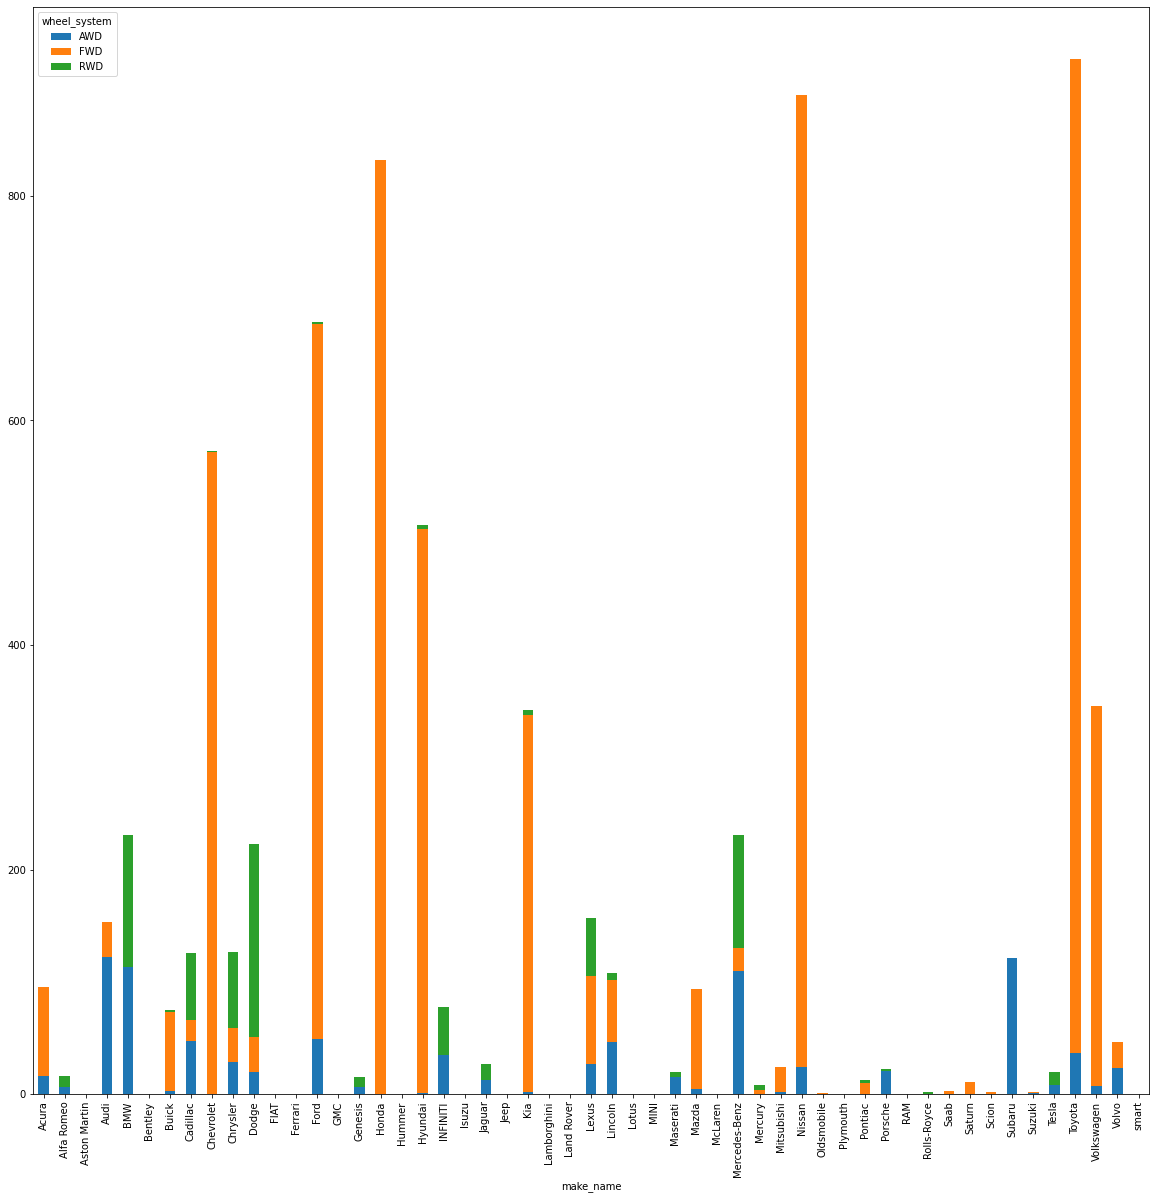

In [31]:
df_seadan_wheelType = pd.crosstab(df_cln_1.make_name, [df_cln_1.body_type , df_cln_1.wheel_system]).Sedan
df_seadan_wheelType.plot(figsize=(20,20), kind="bar", stacked = True)

<AxesSubplot:xlabel='make_name'>

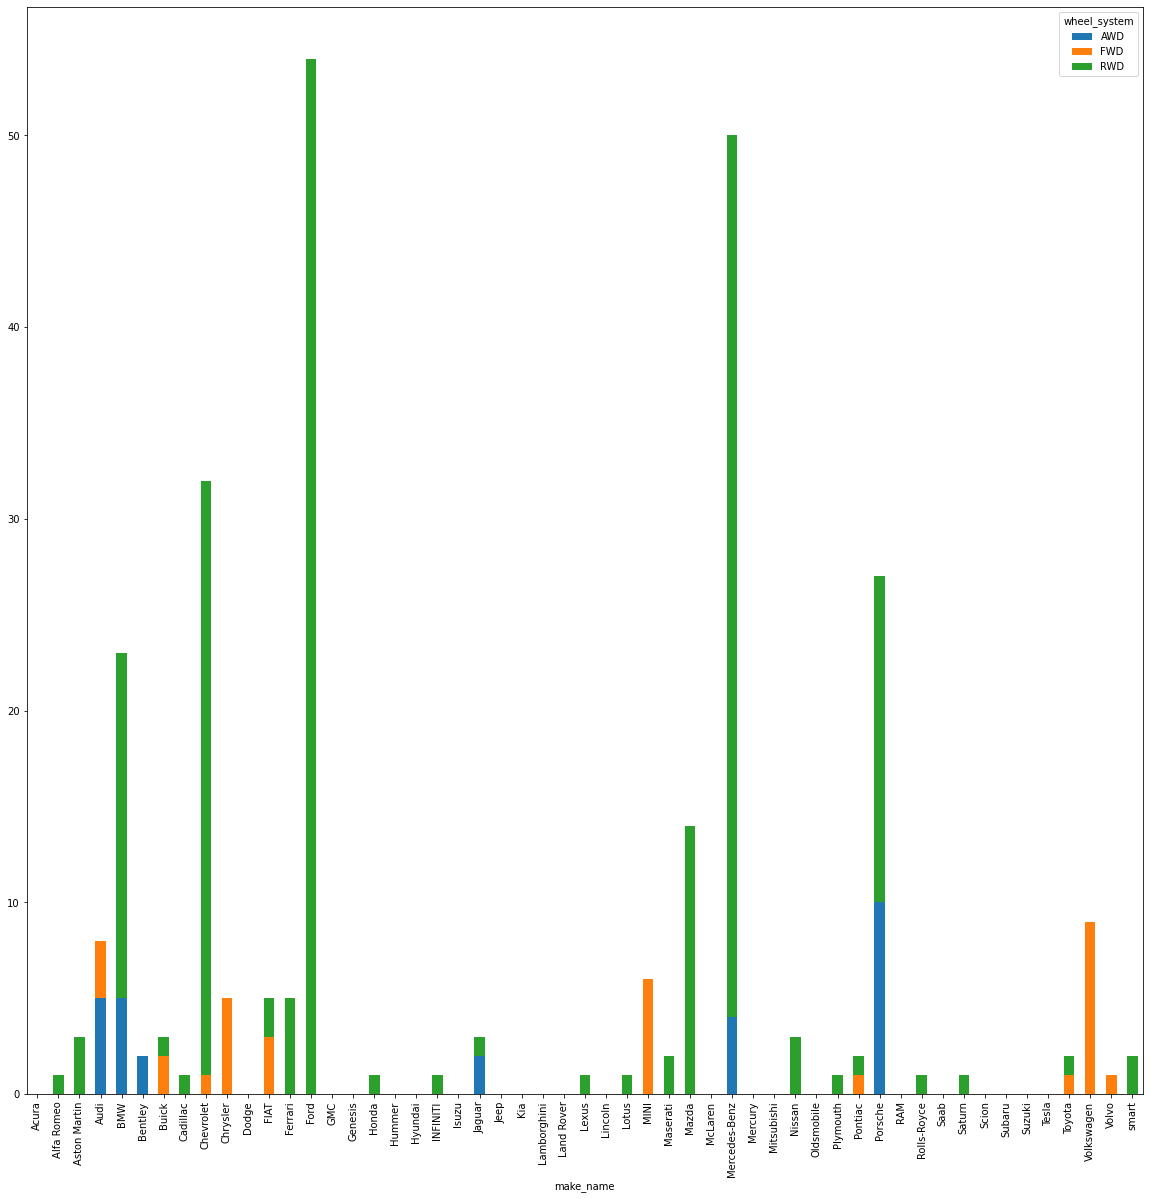

In [32]:
df_convertible_wheelType = pd.crosstab(df_cln_1.make_name, [df_cln_1.body_type , df_cln_1.wheel_system]).Convertible
df_convertible_wheelType.plot(figsize=(20,20), kind="bar", stacked = True)

### Explore Attributes and Class

### New Features

We further group numerical predictors, including "price", to help us to gain more insight. 

This new feature is created using the attribute 'price'. 
We divide price into different price groups as following:

* "<5000"          : price < 5000
* "5000-10000"     : 5000 <= price <= 10000
* "10000-15000"    : 10000 < price <= 15000
* "15000-20000"    : 15000 < price <= 20000
* "20000-25000"    : 20000 < price <= 25000
* "25000 and over" : price > 25000

Obervations after we had used the new price group for data analysing:
* Over 65% of customers spent 25000 and more when buying a used Pickup truck
* Over 50% of customers spent over 20000 for a used SUV
* Over 50% of customers spent between 10000-20000 when buying a used sedan

In [122]:
price_group = []
for price in df_final["price"]:
    if price < 5000:
        price_group.append("<5000")
    elif 5000 <= price <= 10000:
        price_group.append("5000-10000")
    elif 10000 < price <= 15000:
        price_group.append("10000-15000")
    elif 15000 < price <= 20000:
        price_group.append("15000-20000")
    elif 20000 < price <= 25000:
        price_group.append("20000-25000")
    else:
        price_group.append("25000 and over")

In [ ]:
new_df_price = df_final.copy()
new_df_price["price_group"] = price_group
del new_df_price["price"]
new_df_price.head(5)

In [ ]:
sns.catplot(x="price_group", y= "body_type", kind="bar", data=new_df_price)

<AxesSubplot:xlabel='body_type'>

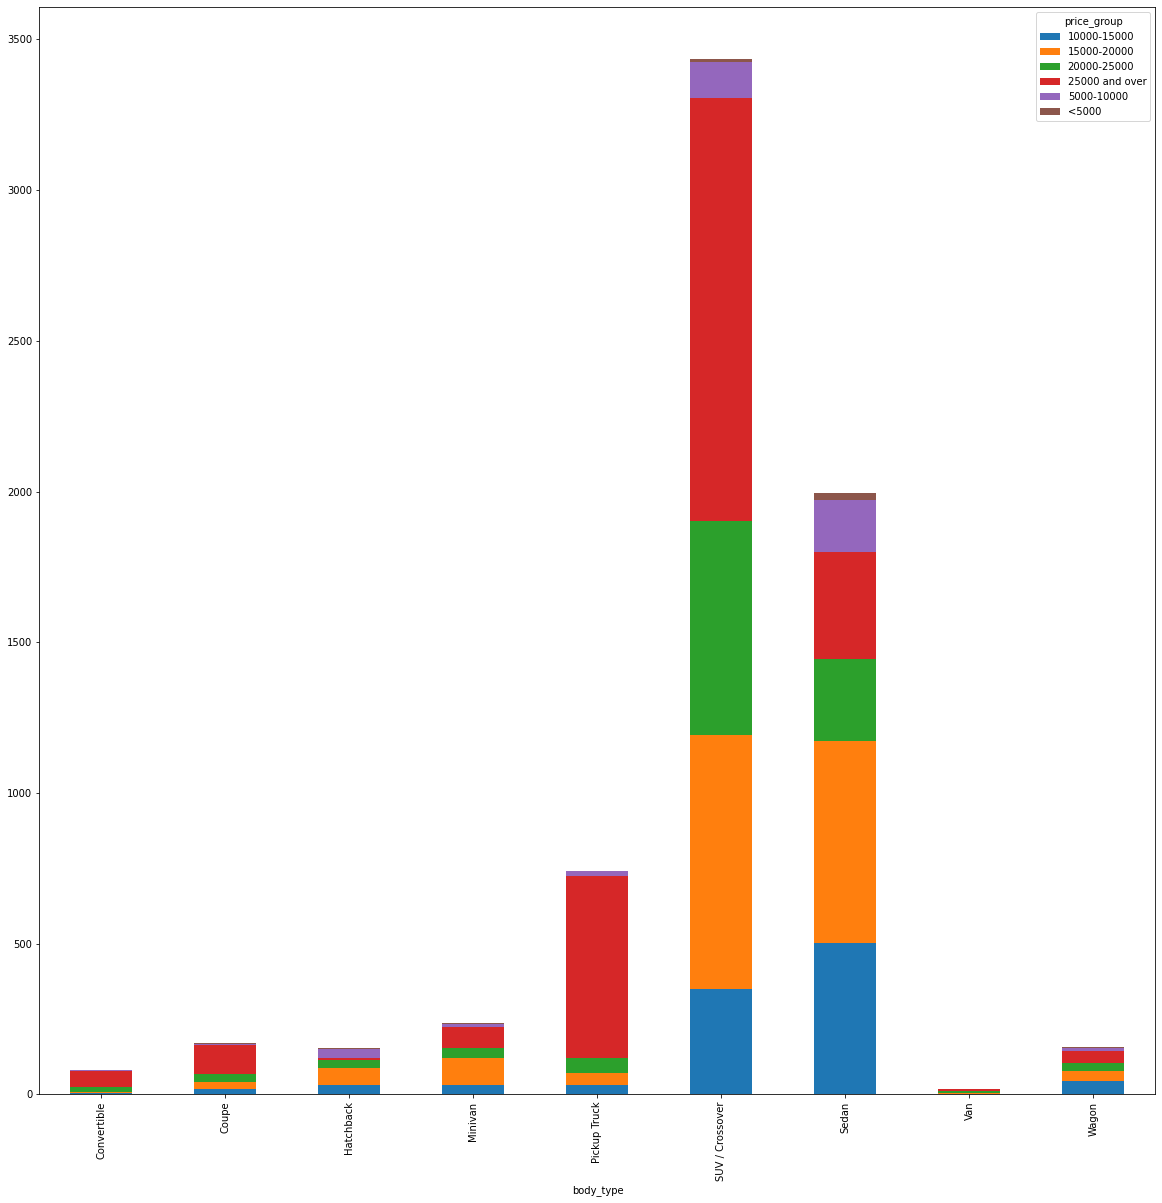

In [131]:
df_price = pd.crosstab(new_df_price.body_type, new_df_price.price_group)
df_price.plot(figsize=(20,20), kind="bar", stacked = True)

### Exceptional Work

In this section, we will use *one hot encoding* to encode the data and do a logistical regression on the data set

In [108]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

First, we encode the categorical features as numbers

In [109]:
def number_encode_features(df_final):
    result = df_final.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

Below shows a snap shot of what the final data looks like after categorical data has been encoded.
You can see the body type is in a numerical representation, instead of a string (object) type, before being encoded.

In [105]:
encoded_data.tail(5)

,body_type,city_fuel_economy,daysonmarket,exterior_color,fuel_type,height,highway_fuel_economy,isCab,maximum_seating,mileage,owner_count,price,seller_rating,year
29974,5,20.0,36,998,3,180,27.0,0,9,93860.0,1.0,27800.0,3.272727,2018
29988,6,22.0,37,411,3,64,34.0,0,6,137167.0,2.0,8962.0,3.900000,2013
29990,5,16.0,7,757,3,186,22.0,1,8,33421.0,1.0,26659.0,4.000000,2019
29992,6,29.0,10,876,3,80,37.0,0,6,20521.0,1.0,15214.0,4.636364,2018
29999,5,23.0,14,699,1,171,29.0,0,8,72601.0,1.0,35920.0,4.600000,2018


As indicated in the heatmap in the sample statistics (above) section, we want to further explore the strong correlation between "price" and "body_type".

In [111]:
encoded_data, encoders = number_encode_features(df_final)
new_series = encoded_data["body_type"]

Here, we are comparing correlation between "body_type" and the rest of the attributes by spliting and scaling the data.

In [112]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns.drop("body_type")], new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

Below, we ran it using "logistic regression"

In [152]:
cls = linear_model.LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)

In [151]:
print (accuracy_score(y_test, y_pred))

0.8912732474964234


In [153]:
features = df_final.copy()
numeric_subset = df_final.select_dtypes('number')
categorical_subset = df_final.select_dtypes('object')

In [155]:
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns])
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

In [86]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print (accuracy_score(y_test, y_pred))

0.9995231282784931


In [156]:
print (fit_and_evaluate(cls))

0.26275631855030995


In [90]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print (coefs.sort_values(ascending = False))

body_type_Convertible        0.673341
maximum_seating_4 seats      0.238705
height_54.9 in               0.152325
maximum_seating_2 seats      0.112438
height_58 in                 0.072945
                               ...   
isCab_False                 -0.038757
body_type_SUV / Crossover   -0.039490
body_type_Sedan             -0.045788
maximum_seating_5 seats     -0.081606
body_type_Coupe             -0.081748
Length: 1533, dtype: float64
